In [1]:
%load_ext lab_black

In [2]:
import pandas as pd

---

# 데이터 둘러보기

In [3]:
train = pd.read_csv("data/train_features.csv")
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [4]:
train_y = pd.read_csv("data/train_labels.csv")
train_y

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [5]:
test = pd.read_csv("data/test_features.csv")
test

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912
...,...,...,...,...,...,...,...,...
469195,3906,595,0.104191,-0.784979,0.639513,-10.475346,14.095361,-190.358982
469196,3906,596,0.103297,-0.758954,0.615687,-25.360272,-8.523018,-180.393291
469197,3906,597,0.128294,-0.749389,0.586184,-27.917723,-23.186245,-162.624160
469198,3906,598,0.104130,-0.692731,0.573397,-27.847980,-30.407555,-138.761676


In [6]:
for i, name in enumerate(train_y.label_desc.unique()):
    print(f"{i:4d}: {len(train_y[train_y['label'] == i]):4d}", name)

   0:   12 Shoulder Press (dumbbell)
   1:   21 Non-Exercise
   2:   20 Biceps Curl (band)
   3:   23 Side Plank Right side
   4:   35 Plank
   5:   25 Chest Press (rack)
   6:   24 Wall Squat
   7:   26 Russian Twist
   8:   97 Running (treadmill)
   9:   37 Pushup (knee or foot variation)
  10:   20 Wall Ball
  11:   23 Dynamic Stretch (at your own pace)
  12:   12 Sit-up (hands positioned behind head)
  13:   12 Tap Right Device
  14:   25 Static Stretch (at your own pace)
  15:   25 Device on Table
  16:   22 Triceps extension (lying down)
  17:   27 Elliptical machine
  18:   47 Burpee
  19:   20 Walking lunge
  20:   26 Lateral Raise
  21:   27 Jump Rope
  22:   19 Triceps Kickback (knee on bench) (label spans both arms)
  23:   20 Medicine Ball Slam
  24:   35 Lunge (alternating both legs, weight optional)
  25:   24 Fast Alternating Punches
  26: 1518 Static stretch
  27:   34 Squat Rack Shoulder Press
  28:   55 Overhead Triceps Extension
  29:   20 Seated Back Fly
  30:   35 

In [7]:
len(train)

1875000

Static stretch를 제외하고는 굉장히 적은 수의 데이터밖에 없다...

In [8]:
x = []
j = 25
for i in range(600):
    x.append(train.iloc[j * 600 + i]["acc_x"])

In [9]:
plt.plot(x)

NameError: name 'plt' is not defined

In [10]:
x[0], x[-1]

(-0.9893996146878352, -0.9290710175932856)

---

# class weight 구하기

{전체 수} / {해당 클래스의 수} 로 하자

In [11]:
weights = []
for i in range(61):
    weight = len(train_y) / len(train_y[train_y["label"] == i])
    print(f"{weight / 61:.2f},", end="")

4.27,2.44,2.56,2.23,1.46,2.05,2.13,1.97,0.53,1.38,2.56,2.23,4.27,4.27,2.05,2.05,2.33,1.90,1.09,2.56,1.97,1.90,2.70,2.56,1.46,2.13,0.03,1.51,0.93,2.56,1.46,2.56,2.85,2.56,2.33,1.71,1.83,1.46,2.56,2.56,1.51,2.56,2.56,1.46,2.44,2.33,2.56,1.97,2.05,1.71,1.38,2.13,4.27,3.94,2.23,1.38,1.42,2.56,2.56,2.23,1.07,

---

# 데이터 numpy 로 변경

In [12]:
from multiprocessing.dummy import Pool

import numpy as np
from tqdm import tqdm

In [13]:
columns = ["acc_x", "acc_y", "acc_z", "gy_x", "gy_y", "gy_z"]

In [14]:
train.iloc[0][columns].to_numpy()

array([  1.20608659,  -0.17937144,  -0.14844666,  -0.59160785,
       -30.54900952, -31.67611187])

In [15]:
train_y.iloc[0]["label"]

37

In [16]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [17]:
train.to_numpy()[0], train.to_numpy().shape

(array([  0.        ,   0.        ,   1.20608659,  -0.17937144,
         -0.14844666,  -0.59160785, -30.54900952, -31.67611187]),
 (1875000, 8))

In [18]:
train_y.to_numpy(), train_y.to_numpy().shape

(array([[0, 37, 'Shoulder Press (dumbbell)'],
        [1, 26, 'Non-Exercise'],
        [2, 3, 'Biceps Curl (band)'],
        ...,
        [3122, 15, 'Dynamic Stretch (at your own pace)'],
        [3123, 26, 'Non-Exercise'],
        [3124, 2, 'Bicep Curl']], dtype=object),
 (3125, 3))

In [19]:
test_np = test.to_numpy()
test_np.shape

(469200, 8)

In [20]:
train_np = train.to_numpy()
train_y_np = train_y.to_numpy()
X, Y = [], []
for i in tqdm(range(3125), total=3125, ncols=100):
    x = train_np[i * 600 : i * 600 + 600, 2:]
    y = train_y_np[i, 1]
    X.append(x)
    Y.append(y)

for i in tqdm(range(782), total=782, ncols=100):
    x = test_np[i * 600 : i * 600 + 600, 2:]
    X.append(x)

100%|████████████████████████████████████████████████████████| 782/782 [00:00<00:00, 1041914.14it/s]


In [21]:
X = np.stack(X).astype(np.float32)
Y = np.stack(Y).astype(np.int64)

In [22]:
X.shape, Y.shape

((3907, 600, 6), (3125,))

In [23]:
print(f"{' ':8}{'max':>14}{'min':>14}{'mean':>14}{'std':>14}")
for i, name in enumerate(columns):
    print(
        f"{name:8}:",
        f"{X[..., i].max():12.4f}, {X[..., i].min():12.4f},",
        f"{X[..., i].mean():12.4f}, {X[..., i].std():12.4f}",
    )

                   max           min          mean           std
acc_x   :       8.4268,      -8.8384,      -0.4492,       0.7178
acc_y   :       8.4846,      -9.2997,      -0.1672,       0.5844
acc_z   :       7.5170,      -8.3164,       0.0540,       0.4727
gy_x    :    1870.2560,   -1811.1267,      -1.3200,      61.3287
gy_y    :    2111.6567,   -1594.2556,      -0.5244,      73.2311
gy_z    :    1255.8491,   -1346.1429,       0.8139,      70.6200


---

# Augmentation??

In [24]:
import matplotlib.pyplot as plt

## 시간별 속도와 위치 정보 역산

처음 위치와 속도는 0이라고 가정

* v_t = v_t-1 + acc_t-1 * 0.02
* d_t = d_t-1 + v_t-1 * 0.02 = d_t-1 + v_t-2 * 0.02 + acc_t-2 * 0.0004

In [25]:
X.shape

(3907, 600, 6)

In [26]:
def standardization(x):
    mean = x.mean()
    std = x.std()
    return (x - mean) / std

In [27]:
additives = []
for j in tqdm(range(3907), total=3907, ncols=100):
    x = X[j]
    for i in range(6):
        x[:, i] = standardization(x[:, i])

    AVx, AVy, AVz, GVx, GVy, GVz = [0], [0], [0], [0], [0], [0]

    for i in range(1, 600):
        AVx.append(AVx[i - 1] + x[i - 1, 0] * 0.02)
        AVy.append(AVy[i - 1] + x[i - 1, 1] * 0.02)
        AVz.append(AVz[i - 1] + x[i - 1, 2] * 0.02)
        GVx.append(GVx[i - 1] + x[i - 1, 3] * 0.02)
        GVy.append(GVy[i - 1] + x[i - 1, 4] * 0.02)
        GVz.append(GVz[i - 1] + x[i - 1, 5] * 0.02)
    AVx = standardization(np.array(AVx))
    AVy = standardization(np.array(AVy))
    AVz = standardization(np.array(AVz))
    GVx = standardization(np.array(GVx))
    GVy = standardization(np.array(GVy))
    GVz = standardization(np.array(GVz))

    ADx, ADy, ADz, GDx, GDy, GDz = [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]

    for i in range(2, 600):
        ADx.append(ADx[i - 1] + 0.02 * AVx[i - 2] + 0.0004 * x[i - 2, 0])
        ADy.append(ADy[i - 1] + 0.02 * AVy[i - 2] + 0.0004 * x[i - 2, 1])
        ADz.append(ADz[i - 1] + 0.02 * AVz[i - 2] + 0.0004 * x[i - 2, 2])
        GDx.append(GDx[i - 1] + 0.02 * GVx[i - 2] + 0.0004 * x[i - 2, 3])
        GDy.append(GDy[i - 1] + 0.02 * GVy[i - 2] + 0.0004 * x[i - 2, 4])
        GDz.append(GDz[i - 1] + 0.02 * GVz[i - 2] + 0.0004 * x[i - 2, 5])
    ADx = standardization(np.array(ADx))
    ADy = standardization(np.array(ADy))
    ADz = standardization(np.array(ADz))
    GDx = standardization(np.array(GDx))
    GDy = standardization(np.array(GDy))
    GDz = standardization(np.array(GDz))

    additive = np.array([AVx, AVy, AVz, GVx, GVy, GVz, ADx, ADy, ADz, GDx, GDy, GDz]).T
    additives.append(additive)

100%|███████████████████████████████████████████████████████████| 3907/3907 [01:04<00:00, 60.68it/s]


In [28]:
additives = np.stack(additives)

In [29]:
X.shape, additives.shape

((3907, 600, 6), (3907, 600, 12))

In [30]:
X = np.concatenate([X, additives], axis=2)

In [31]:
X.shape

(3907, 600, 18)

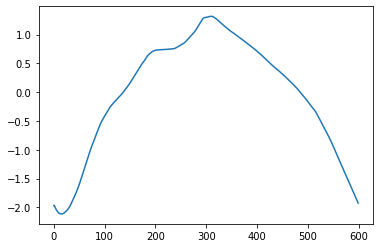

In [32]:
plt.plot(additives[250, :, 9].flatten())

---

# 데이터 확인

In [33]:
X.shape

(3907, 600, 18)

26


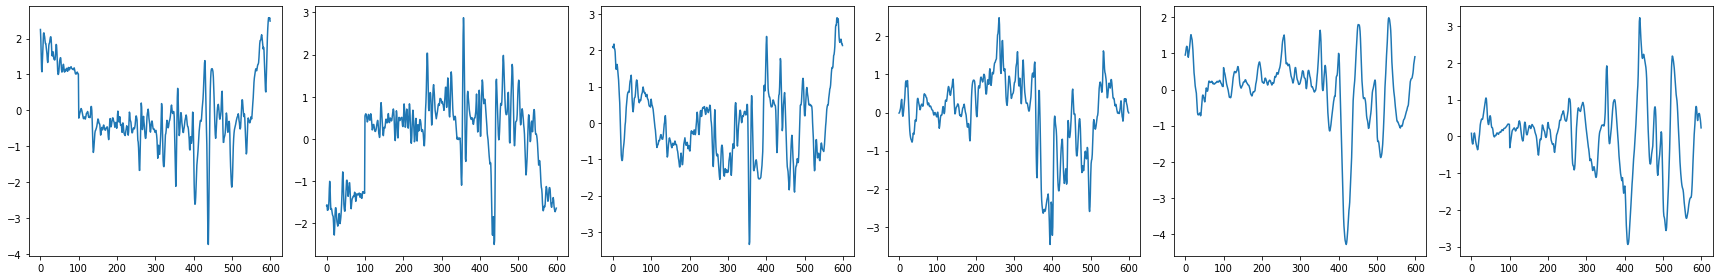

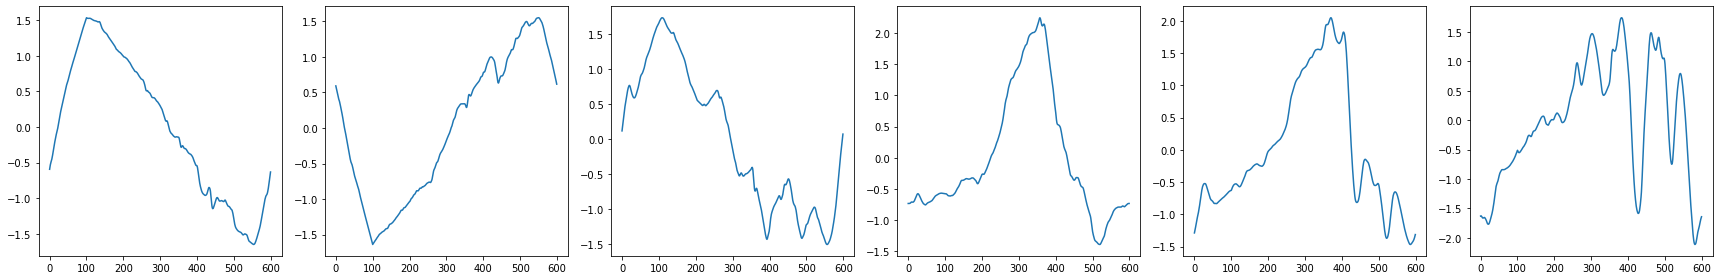

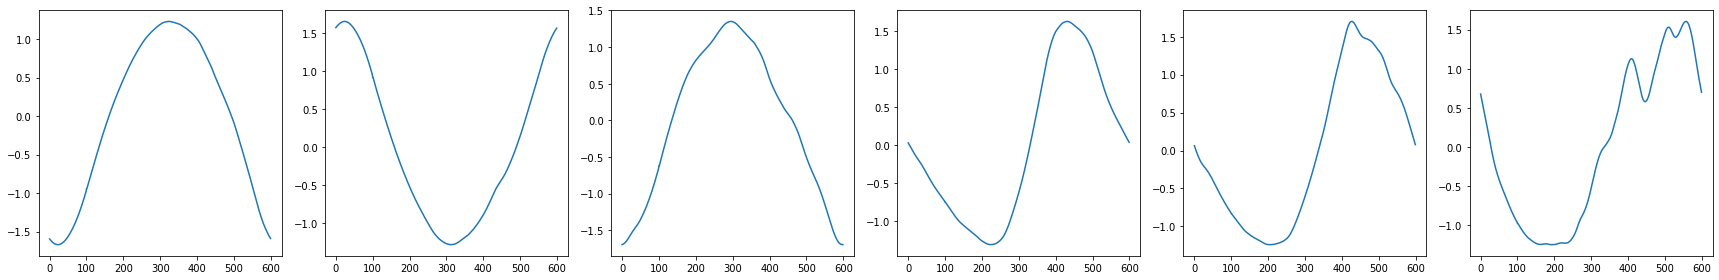

In [54]:
j = 86
print(Y[j])
x = X[j]
x = np.roll(x, 100, axis=0)

plt.figure(figsize=(24, 4))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.plot(x[:, i].flatten())
plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 4))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.plot(x[:, 6 + i].flatten())
plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 4))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.plot(x[:, 12 + i].flatten())
plt.tight_layout()
plt.show()

In [37]:
(X[:, 0, :] - X[:, -1, :]).max()

22.91856366954744

---

# 데이터 npz 파일로 압축

In [55]:
X.shape, Y.shape

((3907, 600, 18), (3125,))

In [56]:
X = np.moveaxis(X, 1, 2)

In [57]:
X.shape, Y.shape

((3907, 18, 600), (3125,))

In [58]:
np.savez_compressed("data/0203.npz", X_train=X[:3125], Y_train=Y, X_test=X[3125:])